# USPS dataset results

In [1]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)
import seaborn as sns

import sys
sys.path.append('../helpers')
from main_loop import setup_experiment, run_experiment

2024-10-15 13:56:21.290272: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Constants

In [2]:
DATA_NAME = "USPS_data"

EPSILON = 0.1
GRID_STEP = 0.01
ORIGINAL_SAMPLE_COUNT = "all"

TF_SEED = 1

## Set up the experiment

Data loaded: ./../data/USPS_data.pickle
Done preparing grid: (4680000, 2)


NCMs for labels:   0%|          | 0/10 [00:00<?, ?it/s]

NCMs for labels:   0%|          | 0/10 [00:00<?, ?it/s]

p-values for labels:   0%|          | 0/10 [00:00<?, ?it/s]

dict_keys(['grid_arrays', 'grid_points', 'ps_grid', 'X_train', 'y_train', 'X_test', 'y_test', 'X_prop', 'y_prop', 'X_calib', 'y_calib'])

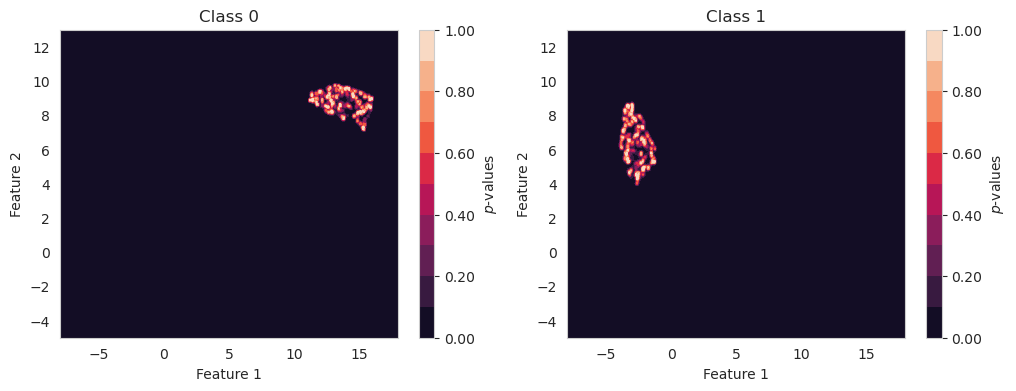

In [3]:
setup_dict = setup_experiment(DATA_NAME, grid_step=GRID_STEP, nr_train_samples=ORIGINAL_SAMPLE_COUNT, prop_size=0.6)
setup_dict.keys()

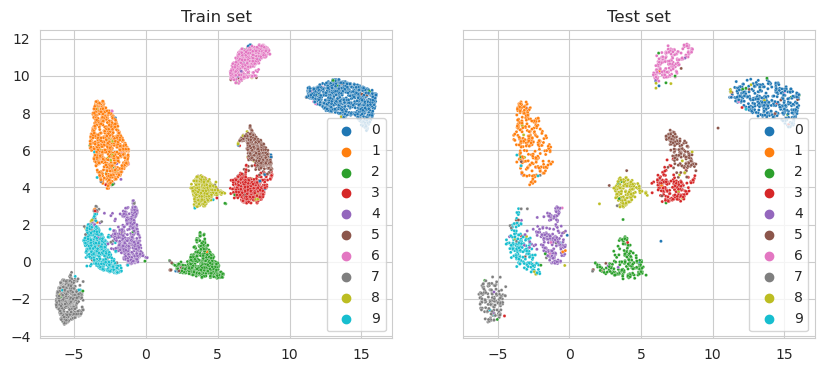

In [4]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.scatterplot(x=setup_dict['X_train'][:, 0], y=setup_dict['X_train'][:, 1], hue=setup_dict['y_train'], palette="tab10", s=5, ax=axs[0])
axs[0].set_title("Train set")
sns.scatterplot(x=setup_dict['X_test'][:, 0], y=setup_dict['X_test'][:, 1], hue=setup_dict['y_test'], palette="tab10", s=5, ax=axs[1])
axs[1].set_title("Test set")

plt.legend()
plt.show()

## Original samples result

In [5]:
run_experiment(setup_dict, is_original=True, tf_seed=TF_SEED)

2024-10-15 13:56:56.938745: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.




Baseline results: ORIGINAL
63/63 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.80      0.98      0.88       359
           1       0.93      0.98      0.96       264
           2       0.94      0.87      0.90       198
           3       0.91      0.74      0.82       166
           4       0.92      0.88      0.90       200
           5       0.78      0.57      0.66       160
           6       0.93      0.95      0.94       170
           7       0.95      0.91      0.93       147
           8       0.93      0.85      0.89       166
           9       0.87      0.96      0.91       177

    accuracy                           0.89      2007
   macro avg       0.90      0.87      0.88      2007
weighted avg       0.89      0.89      0.88      2007



## Synthetic sample results

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


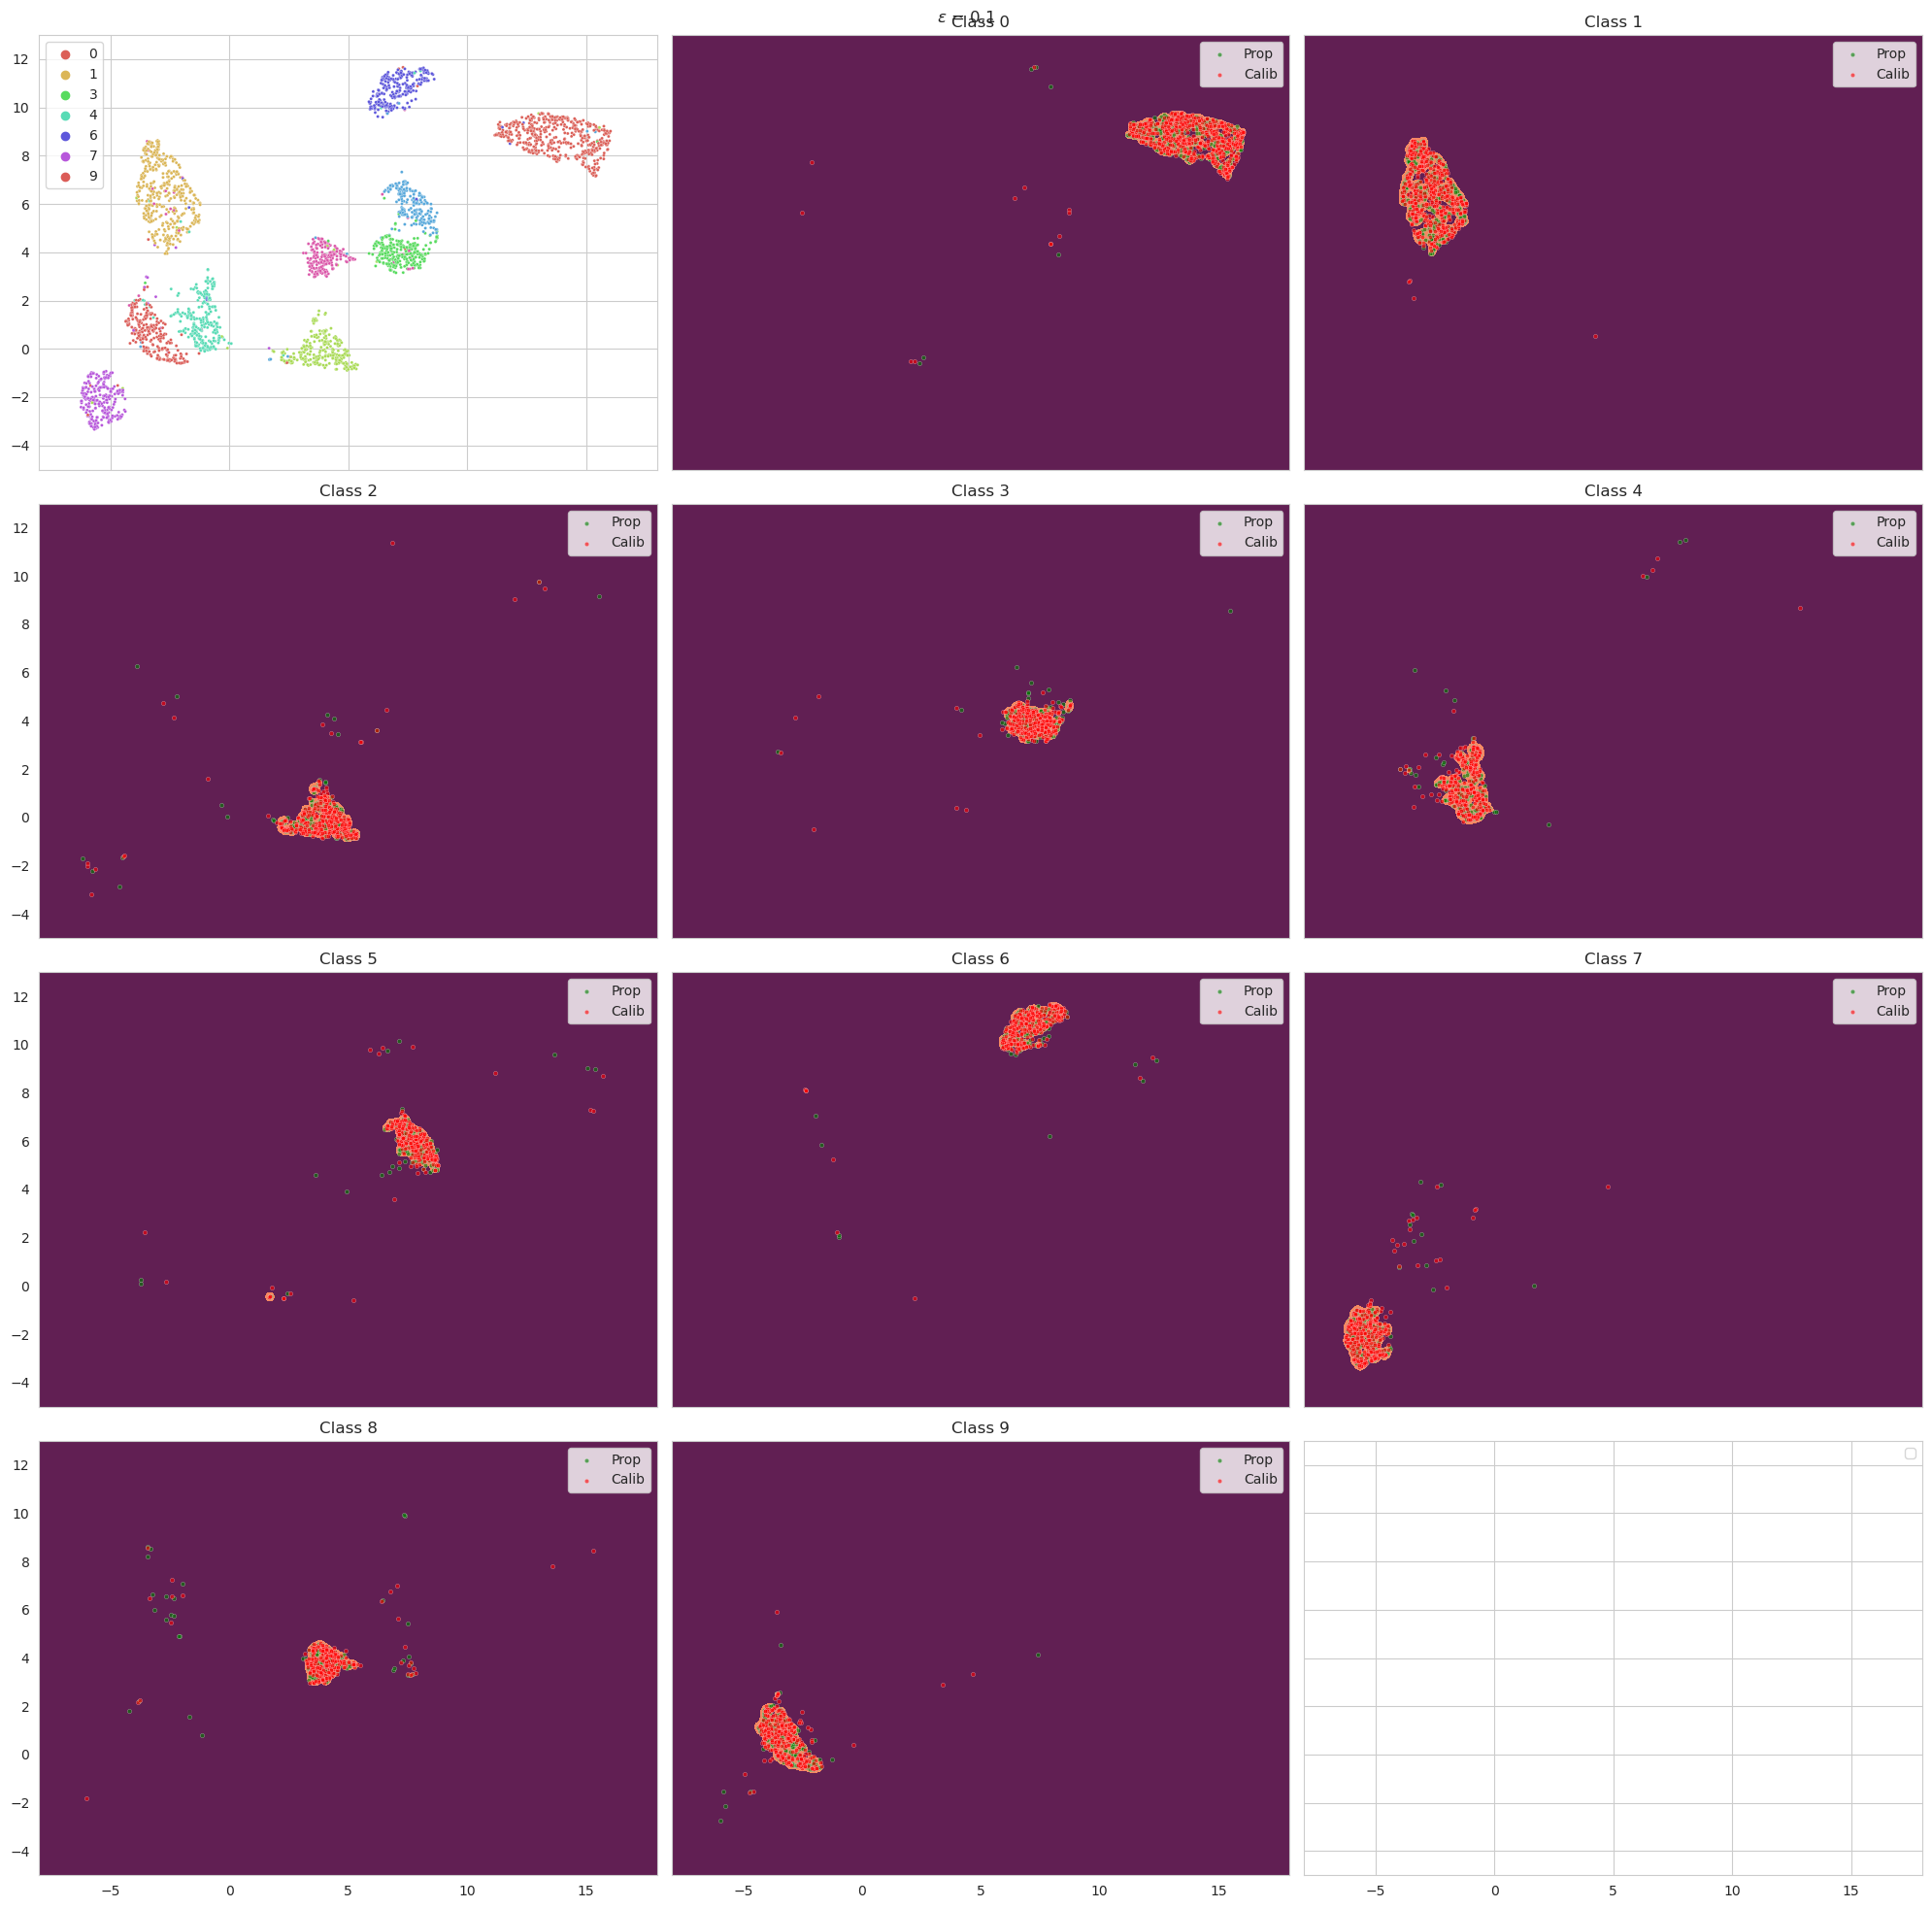

Synthetic samples per class
Label 0: (66377, 2)
Label 1: (74295, 2)
Label 2: (38705, 2)
Label 3: (29166, 2)
Label 4: (42426, 2)
Label 5: (27650, 2)
Label 6: (28251, 2)
Label 7: (36457, 2)
Label 8: (24028, 2)
Label 9: (38896, 2)


Total synthetic samples: (406251, 2)
SYNTHETIC ONLY
63/63 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       359
           1       0.95      0.98      0.97       264
           2       0.95      0.86      0.90       198
           3       0.88      0.91      0.90       166
           4       0.93      0.91      0.92       200
           5       0.93      0.86      0.89       160
           6       0.93      0.95      0.94       170
           7       0.95      0.91      0.93       147
           8       0.93      0.85      0.89       166
           9       0.86      0.96      0.91       177

    accuracy                           0.93      2007
   macro avg   

In [6]:
run_experiment(setup_dict, is_synthetic=True, epsilon=EPSILON, tf_seed=TF_SEED)